In [59]:
%matplotlib notebook
from ipywidgets import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from ipywidgets import interact

direc = r'D:\Documents\AHC-BME\PhD\mPAP - vortex\Results' #directory for results

shape = pd.read_csv(direc+'\Shape.csv')

x_data_1 = np.array(shape['t_vortex_test'])
x_data_2 = np.array(shape['mPAP'])
shape_params = shape.iloc[:, 1:15]
y_data = np.array((shape_params)).T

selected_columns = shape.iloc[:, 1:15].columns

# Convert the column names to a list of strings
params = selected_columns.tolist()


<IPython.core.display.Javascript object>


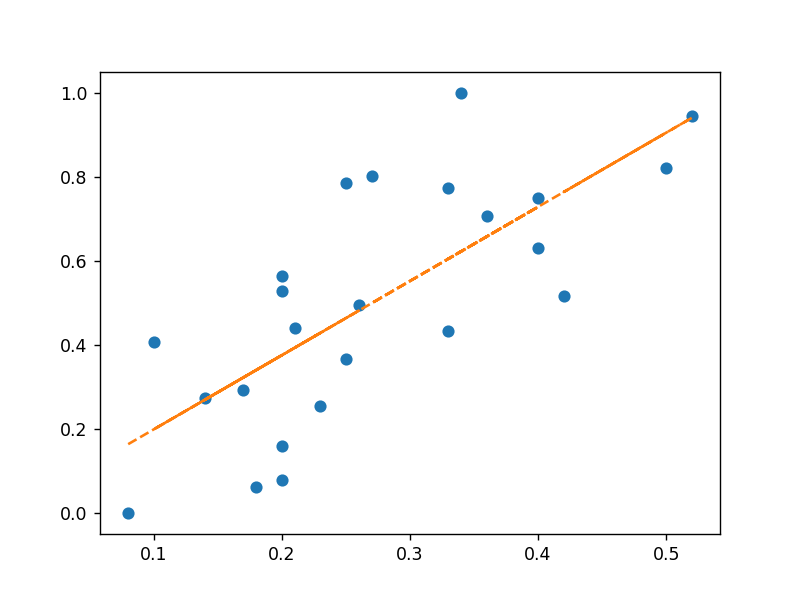

In [280]:
shape_score = np.array(shape['Shape score'])
norm_shape_score = (shape_score - min(shape_score))/(max(shape_score) - min(shape_score))

plt.plot(x_data, norm_shape_score, 'o')
plt.show()

# Add regression line
coeffs = np.polyfit(x_data, norm_shape_score, 1)
p = np.poly1d(coeffs)
plt.plot(x_data, p(x_data), '--')



In [62]:
from scipy.stats import linregress

r_squared_t =[]
r_squared_p =[]

for i in range(len(params)):

    slope, intercept, r_value_1, p_value, std_err = linregress(y_data[i], x_data_1)
    r2_1 = r_value_1**2
    slope, intercept, r_value_2, p_value, std_err = linregress(y_data[i], x_data_2)
    r2_2 = r_value_2**2
    
    r_squared_t.append(r2_1)
    r_squared_p.append(r2_2)
    
data = {Parameters: params,
        'R_squared_T': r_squared_t,
       'R_squared_P': r_squared_p}

df = pd.DataFrame(data)


In [213]:
import plotly.graph_objects as go
from scipy.stats import linregress
import math

def interactive_selection_plot(df):
    
  def update_plot(**kwargs):

    # Create the Figure
    fig = go.FigureWidget()
    filtered_df = pd.DataFrame()
    
    
    for i, (checkbox_name, selected) in enumerate(kwargs.items()):
      if selected:
        filtered_df = pd.concat([filtered_df, pd.DataFrame(df.loc[i]).T], ignore_index=True)
        
    # Add Bar Trace
    fig.add_trace(go.Bar(x=filtered_df['Parameters'],
        y=np.array(filtered_df['R_squared_T'])))
    
    # Customize Layout
    fig.update_layout(
    title='Interactive Bar Chart with R-squared',
    xaxis_title='Parameter',
    yaxis_title='R2')
    
    # Display the Figure
    fig.show()

    
  # Create checkboxes for each data set
  checkboxes = {}
  for i, parameter in enumerate(df['Parameters']):
    checkbox = widgets.Checkbox(value=True, description=str(df['Parameters'][i]))
    checkboxes[f'checkbox_{i+1}'] = checkbox


  
  interact(update_plot, **checkboxes)


interactive_selection_plot(df)





interactive(children=(Checkbox(value=True, description='Bif angle'), Checkbox(value=True, description='L_MPA')…

In [275]:
import plotly.graph_objects as go
from scipy.stats import linregress
import math

def interactive_selection_plot(df, y_arrays):
  
  def update_plot(**kwargs):

    # Create the Figure
    fig = go.FigureWidget()
    filtered_df = pd.DataFrame()
    
    
    for i, (checkbox_name, selected) in enumerate(kwargs.items()):
        if i in range(len(df)):
          if selected:
            filtered_df = pd.concat([filtered_df, pd.DataFrame(df.loc[i]).T], ignore_index=True)
        
    # Create traces based on selected y-arrays
    traces = []
    selected_y_array = kwargs.get('y_array')
    for y_array in y_arrays:
        if selected_y_array == y_array:
            traces.append(go.Bar(x=filtered_df['Parameters'],
                                y=np.array(filtered_df[y_array]),
                                name=y_array))

    # Add traces to the figure
    fig.add_traces(traces)
    
    # Customize Layout
    fig.update_layout(
    title='Interactive Bar Chart with R-squared',
    xaxis_title='Parameter',
    yaxis_title='R2')
    
    # Display the Figure
    fig.show()

    
  # Create checkboxes for each data set
  checkboxes = {}
  for i, parameter in enumerate(df['Parameters']):
    checkbox = widgets.Checkbox(value=True, description=str(df['Parameters'][i]))
    checkboxes[f'checkbox_{i+1}'] = checkbox

  

  y_array_dropdown = widgets.Dropdown(
                options=y_arrays,
                description='Y-array:',
                value=y_arrays[0])  # Default selection
  checkboxes_tuple = tuple(checkboxes.values())
  layout = widgets.VBox([widgets.HBox(checkboxes_tuple), y_array_dropdown])
  interact(update_plot, **checkboxes, y_array=y_array_dropdown)


y_arrays = ['R_squared_T', 'R_squared_P']
interactive_selection_plot(df, y_arrays)





interactive(children=(Checkbox(value=True, description='Bif angle'), Checkbox(value=True, description='L_MPA')…

In [324]:
n_tests = 7
results = pd.read_csv(direc+'\Parametric_Results.csv')
col = results.columns

for t in range(n_tests):
    sel_col = col[t*3:t*3+3]
    test = results[sel_col].dropna()
    
    
   
    
    

In [ ]:
def interactive_parametric_plot(x_data, y_data, tests):
  """
  Creates an interactive plot with correspondence between literature predicted vortex duration and either CFD or 4D methods,
  allowing users to select which method to display.

  Args:
      x_data: Literature predicted vortex duration
      y_data_sets: A list of lists or arrays, each representing a method of vortex duration quantification.
  """

  def update_plot(**kwargs):
    """
    Updates the plot with the selected y-data sets and regression lines.

    Args:
      kwargs: A dictionary of checkbox names (e.g., 'checkbox_1') and their corresponding boolean values.
    """
    
    plt.figure(figsize=(8, 6))
    for i, (checkbox_name, selected) in enumerate(kwargs.items()):
      if selected:
        label = methods[i]
        plt.plot(x_data, y_data_sets[i], 'o', label=label)
        
        # Add regression line
        reg = LinearRegression().fit(x_data.reshape(-1, 1), y_data_sets[i].reshape(-1,1))
        score = reg.coef_*np.transpose(x_data)
        r_squared = r2_score(x_data.reshape(-1, 1), y_data_sets[i].reshape(-1, 1))
        plt.plot(x_data, np.transpose(score), '--', label=f'{label} Regression, R2 = %.2f'%r_squared)
        
    plt.xlabel('Literature vortex duration')
    plt.ylabel('Method vortex duration')
    plt.title('Interactive Selection Plot with Regression')
    plt.legend()
    plt.grid(True)
    plt.show()

  # Create checkboxes for each data set
  checkboxes = {}
  for i, y_data_set in enumerate(y_data_sets):
    checkbox = widgets.Checkbox(value=True, description=str(methods[i]))
    checkboxes[f'checkbox_{i+1}'] = checkbox

  # Create the interactive plot
  interact(update_plot, **checkboxes)

new_y_data = [y_CFD, y_4D]
methods = ['CFD', '4D']
interactive_parametric_plot(y_Lit, new_y_data, methods)